In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
FILEPATH = '~/Study in MISIS/MISIS-master/notebooks/season_2/dz_3/DataSet_w_NA.xlsx'
df = pd.read_excel(FILEPATH, sheet_name="Испорченные факты").dropna()
# df.head()
table = pd.pivot_table(df, index='Факты.Товар ID', values = ['Продажи, шт', 'Продажи, руб', 'Маржинальная прибыль',
                                                             'Повторение заказа', 'Повторение товара'], 
                       aggfunc={'Продажи, шт': [np.median, np.sum],
                              'Продажи, руб': [np.median, np.sum],
                              'Повторение заказа': np.sum,
                              'Маржинальная прибыль': np.sum})
# table
newname=table.columns.map('_'.join)
table.columns=newname
table=table.reset_index()
total_sale=table['Продажи, руб_sum'].sum()
table['Доля']=table['Продажи, руб_sum']/total_sale * 100
table = table.sort_values(by=('Продажи, руб_sum'), ascending=False)
table=table.assign(sum_d=table['Доля'].cumsum())
table.loc[(table['sum_d'] <= 80), 'ABC'] = 'A'
table.loc[(table['sum_d'] > 80) & (table['sum_d'] <= 95), 'ABC'] = 'B'
table.loc[(table['sum_d'] > 95), 'ABC'] = 'C'
# table
table['ABC'] = table['ABC'].astype('category')
table['class'] = table['ABC'].cat.codes 
dict_of_classes = dict(enumerate(table["ABC"].cat.categories))
# print(dict_of_classes) -> {0: 'A', 1: 'B', 2: 'C'}
def RandomForest_model(features, predict_values):
    X = table[features]
    Y = table['class']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2020, stratify=Y)
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    y_train = np.array(y_train)
    rfc = RandomForestClassifier(min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='auto')
    rfc.fit(X_train_scaled, y_train)
    print(f'RFC score {rfc.score(X_train_scaled, y_train)}')
    y_pred = rfc.predict(X_test_scaled)
    accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model is {round(accuracy_score(y_test, y_pred),3)*100} %")
    predict_data = [predict_values]
    predict_data_scaled = ss.transform(predict_data)
    new_class = rfc.predict(predict_data)
    if new_class[0] in dict_of_classes.keys():
        class_name = dict_of_classes[new_class[0]]
    print(f'Предсказанный класс: {class_name}')

def SVM_model(features, predict_values):
    X = table[features]
    Y = table['class']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2020, stratify=Y)
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    y_train = np.array(y_train)
    svm_model = svm.SVC()
    svm_model.fit(X_train_scaled, y_train)
    print(f'SVM score {round(svm_model.score(X_train_scaled, y_train), 2)}')
    y_pred = svm_model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model is {round (score, 4) * 100} %")
    predict_data = [predict_values]
    predict_data_scaled = ss.transform(predict_data)
    new_class = svm_model.predict(predict_data)
    if new_class[0] in dict_of_classes.keys():
        class_name = dict_of_classes[new_class[0]]
    print(f'Предсказанный класс: {class_name}')
    
def KNN_Classifier_model(features, predict_values):
    X = table[features]
    Y = table['class']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2020, stratify=Y)
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    y_train = np.array(y_train)
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_train)
    print(f'SVM score {round(knn_model.score(X_train_scaled, y_train), 2)}')
    y_pred = knn_model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model is {round (score, 4) * 100} %")
    predict_data = [predict_values]
    predict_data_scaled = ss.transform(predict_data)
    new_class = knn_model.predict(predict_data)
    if new_class[0] in dict_of_classes.keys():
        class_name = dict_of_classes[new_class[0]]
    print(f'Предсказанный класс: {class_name}')
    
RandomForest_model(features = ['Продажи, руб_median', 'Продажи, шт_sum', 'Доля'], predict_values = [812, 2, 0.00007])
SVM_model(features = ['Продажи, руб_sum', 'Продажи, шт_sum', 'Доля'], predict_values = [1000, 7, 3.34])
KNN_Classifier_model(features = ['Продажи, руб_median', 'Маржинальная прибыль_sum', 'Доля'], predict_values = [100, 134235, 1])

RFC score 0.9993284083277367
The accuracy of the model is 99.7 %
Предсказанный класс: B
SVM score 0.95


/home/ivan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ivan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The accuracy of the model is 93.57 %
Предсказанный класс: A
SVM score 0.99
The accuracy of the model is 98.11999999999999 %
Предсказанный класс: A


/home/ivan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


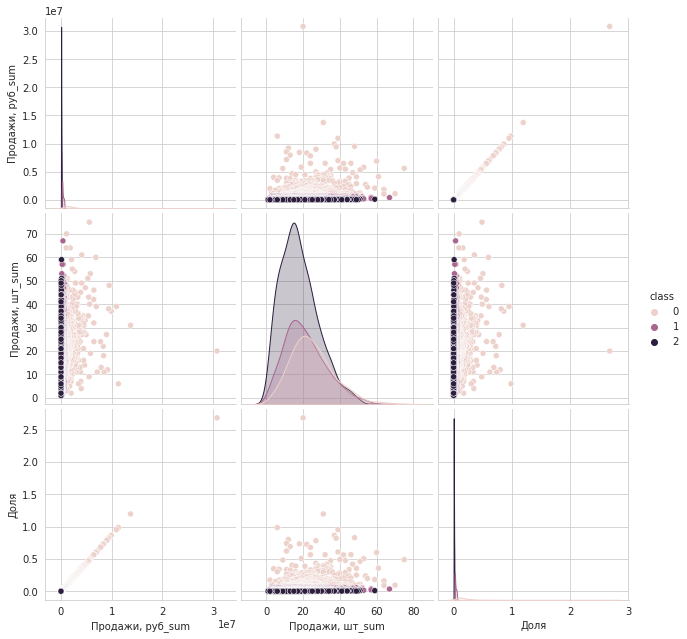

In [4]:
sns.set_style("whitegrid")
sns.pairplot(table[['Продажи, руб_sum', 'Продажи, шт_sum', 'Доля', 'class']], hue = 'class', height = 3)
plt.show()

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 387 kB/s            
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
